In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [5]:
from google.colab import files


uploaded = files.upload()


Saving rainfall in india 1901-2015.csv to rainfall in india 1901-2015.csv


In [6]:
df=pd.read_csv("rainfall in india 1901-2015.csv")

In [7]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [8]:
df.fillna(value = 0,inplace =True)

In [9]:
df.loc[21]

SUBDIVISION    ANDAMAN & NICOBAR ISLANDS
YEAR                                1923
JAN                                 79.5
FEB                                    0
MAR                                    0
APR                                 91.3
MAY                                293.5
JUN                                808.4
JUL                                636.9
AUG                                182.2
SEP                                560.5
OCT                                131.9
NOV                                197.4
DEC                                 70.6
ANNUAL                                 0
Jan-Feb                             79.5
Mar-May                                0
Jun-Sep                             2188
Oct-Dec                            399.9
Name: 21, dtype: object

In [10]:
grouped = df.groupby(df.SUBDIVISION)
TN = grouped.get_group("TAMIL NADU")

In [11]:
TN.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
3427,TAMIL NADU,1901,24.5,39.1,21.7,36.0,74.0,41.8,49.3,67.9,191.1,122.3,212.3,80.4,960.3,63.6,131.6,350.1,415.0
3428,TAMIL NADU,1902,67.2,9.8,25.1,21.9,84.7,39.3,55.1,113.8,98.6,282.2,174.9,165.8,1138.2,77.0,131.7,306.7,622.9
3429,TAMIL NADU,1903,19.3,7.8,1.7,18.2,128.5,58.5,72.6,115.0,210.4,128.1,200.5,203.2,1163.9,27.1,148.4,456.5,531.9
3430,TAMIL NADU,1904,35.2,0.1,0.7,19.5,121.9,34.9,89.0,40.4,85.7,163.2,23.6,49.1,663.1,35.3,142.1,249.9,235.8
3431,TAMIL NADU,1905,6.5,7.5,17.2,64.8,83.7,49.8,39.0,101.8,73.5,250.4,123.7,3.2,821.1,14.0,165.7,264.1,377.2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84a5718ad0>,
      dtype=object)

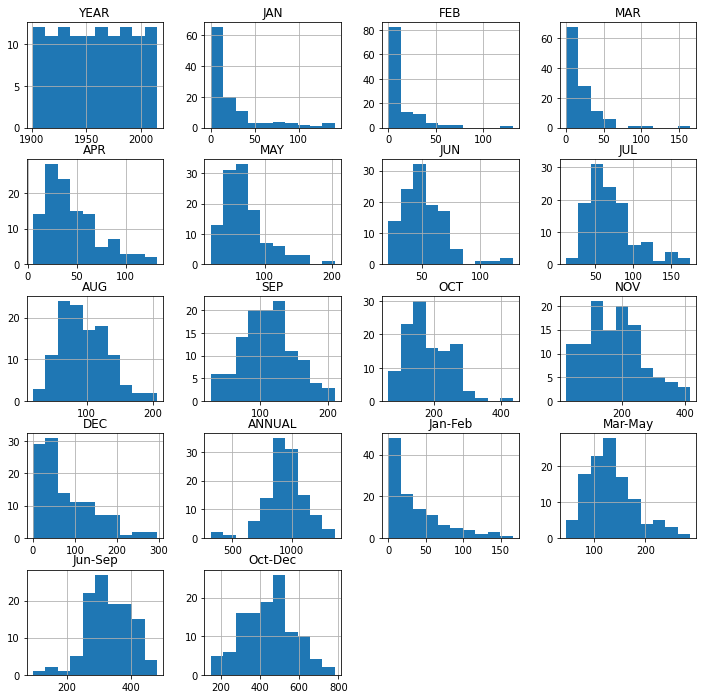

In [12]:
TN.hist(figsize=(12,12))

In [13]:
data = np.asarray(TN[['FEB', 'MAR', 'APR','MAY']])
print(np.shape(data))
X = data[:,0:3]
y = data[:,3]

(115, 4)


In [14]:
data = np.asarray(TN[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])
print(np.shape(data))

(115, 12)


In [15]:

X = None; y = None
for i in range(data.shape[1]-3):
    if X is None:
        X = data[:, i:i+3]
        y = data[:, i+3]
    else:
        X = np.concatenate((X, data[:, i:i+3]), axis=0)
        y = np.concatenate((y, data[:, i+3]), axis=0)



In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
np.shape(X_test)

(207, 3)

*Random Forest Regression*

In [18]:
rf = RandomForestRegressor(n_estimators = 100, max_depth=10, n_jobs=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mean_absolute_error(y_test, y_pred)

45.42821797005536

In [19]:
xx = np.arange(start=0,stop=len(y_pred),step=1)

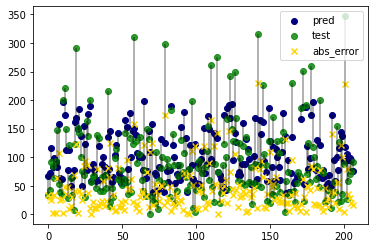

In [20]:
plt.vlines(x=xx, ymin=y_pred, ymax=y_test, color='black', alpha=0.4)
plt.scatter(xx,y_pred,color='navy', alpha=1, label='pred')
plt.scatter( xx,y_test, color='green', alpha=0.8 , label='test')
plt.scatter(xx,np.abs(y_pred-y_test),color='gold',label='abs_error',marker='x')
plt.legend()

*Linear Regression*

In [21]:
linear_regressor = LinearRegression()  
linear_regressor.fit(X_train, y_train)  
Y_pred = linear_regressor.predict(X_test)  
mean_absolute_error(y_test, Y_pred)

46.89449574289162

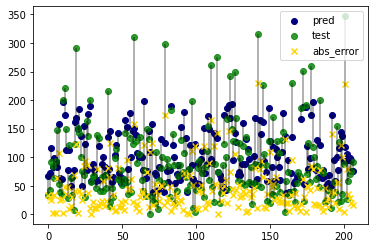

In [22]:
plt.vlines(x=xx, ymin=y_pred, ymax=y_test, color='black', alpha=0.4)
plt.scatter(xx,y_pred,color='navy', alpha=1, label='pred')
plt.scatter( xx,y_test, color='green', alpha=0.8 , label='test')
plt.scatter(xx,np.abs(y_pred-y_test),color='gold',label='abs_error',marker='x')
plt.legend()

*Lasso Regression*

In [23]:
lrf = Lasso(alpha = 1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None)
lrf.fit(X_train, y_train)
y_pred = lrf.predict(X_test)
mean_absolute_error(y_test, y_pred)

46.898926943059614

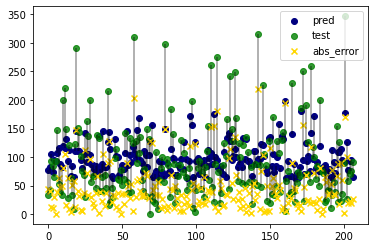

In [24]:
plt.vlines(x=xx, ymin=y_pred, ymax=y_test, color='black', alpha=0.4)
plt.scatter(xx,y_pred,color='navy', alpha=1, label='pred')
plt.scatter( xx,y_test, color='green', alpha=0.8 , label='test')
plt.scatter(xx,np.abs(y_pred-y_test),color='gold',label='abs_error',marker='x')
plt.legend()

In [25]:
rf = RandomForestRegressor(n_estimators = 100, max_depth=10, n_jobs=1)
rf.fit(X, y)
y_pred = rf.predict(X)
mean_absolute_error(y, y_pred)

26.537908587517492

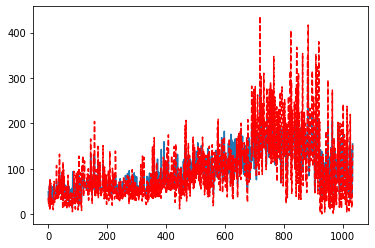

In [26]:
x_tot =np.arange(start=0,stop=len(y_pred),step=1)
plt.plot(x_tot,y_pred)
plt.plot(x_tot,y, "r--")